# k近邻分类和回归


## 1. 数据集

In [58]:
import mglearn
import matplotlib.pyplot as plt

# 生成数据集
X, y = mglearn.datasets.make_forge()
print(X)
print(X.shape)
print(y)
print(y.shape)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
(26, 2)
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
(26,)


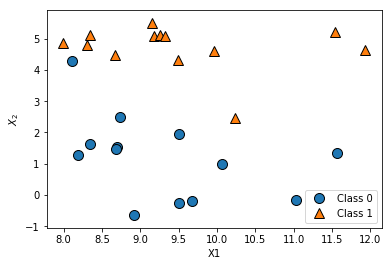

In [59]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"])
plt.xlabel("X1")
plt.ylabel("$X_2$")
plt.show()

问题: 给定一个新的数据(点)(9,-1), 这个点属于哪一类? 从该点与其他已知点的距离猜测: 属于0类.
(11, 6)呢?

分类: 从已知的数据集出发,先训练一个模型. 对于一个从未见过的数据, 判断它所属的类别.

kNN(k Nearest Neighbors)分类:
前提: 要定义出距离.


#### 学习目标:
    1. kNN的原理
    2. scikit-learn来实现KNN算法

## 2. 求N维空间中两点的距离

In [60]:
import numpy as np

def distance(p1,p2):
    """返回两点的距离(欧几里得距离)"""
    return np.sqrt(np.sum(np.power(p1 - p2, 2)))

a = np.array([4,0,3,4])
c = np.array([4,3,1,5])
o = np.array([0,0,0,0])

distance(a,c)
np.sum(a * c)

39

## 2. 投票函数

In [61]:
def count_vote(votes):
    count_dict = {}
    for vote in votes:
        # known labels
        if vote in count_dict:
            count_dict[vote] += 1
        # unknown labels
        else:
            count_dict[vote] = 1
    return count_dict

# 定义一个序列
votes = [1,2,1,3,4,2,2,2,3,3,2,3,3]

#调用
vote_count = count_vote(votes)
vote_count
            

{1: 2, 2: 5, 3: 5, 4: 1}

In [62]:
vote_count.keys()

dict_keys([1, 2, 3, 4])

In [63]:
vote_count.values()

dict_values([2, 5, 5, 1])

In [64]:
max(vote_count.values())

5

items(): 提取出关键字和对应的值

In [65]:
for vote, count in vote_count.items():
    print(vote,count)

1 2
2 5
3 5
4 1


In [66]:
# 找出出现次数做多的标签
winners = []
max_count = max(vote_count.values())
for vote, count in vote_count.items():
    if count == max_count:
        print(vote, count)
        winners.append(vote)
        print(winners)

2 5
[2]
3 5
[2, 3]


In [96]:
import random
# 投票
def majority_vote(votes):
    count_dict = {}
    
    for vote in votes:
        # known labels
        if vote in count_dict:
            count_dict[vote] += 1
        # unknown labels
        else:
            count_dict[vote] = 1

    winners = []
    max_count = max(count_dict.values())
    for vote, count in count_dict.items():
        if count == max_count:
            #print(vote, count)
            winners.append(vote)
    return random.choice(winners)

votes = [1,2,1,3,4,4,4,4,4,4,2,3,3,2,3,3]
majority_vote(votes)

4

Mode(众数)的概念:



In [68]:
import scipy.stats as ss 

def majority_vote_simple(votes):
    """返回序列中最高频的元素"""
    mode, count = ss.mstats.mode(votes)
    return mode

votes = [1,2,1,3,4,2,2,2,3,3,2,3,3]
majority_vote_simple(votes)

array([2.])

### 4. 如何找出最近的邻居

求最近邻居的基本思想:
   
    对所有点:
      求出该点(p)到其他点的距离
    对距离排序,选出离p点距离最近的k个点

[-1.5, 1.5, -1.5, 1.5]

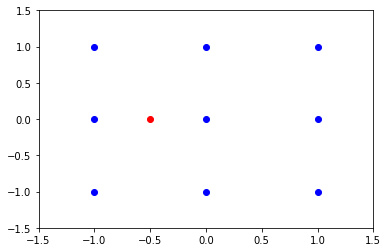

In [69]:
# import matplotlib.pyplot as plt
points = np.array([[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]])
p = np.array([-.5,0])

plt.plot(points[:,0], points[:,1], "ob") # blue
plt.plot(p[0],p[1],"or") # red

# 设置图像范围
plt.axis([-1.5,1.5,-1.5, 1.5])

In [70]:
points = np.array([[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]])
p = np.array([-.5,0])

distances = np.zeros(points.shape[0])

for i in range(len(distances)):
    distances[i] = distance(points[i],p)

print("p点与序列中的点的距离:",distances)

p点与序列中的点的距离: [1.11803399 0.5        1.11803399 1.11803399 0.5        1.11803399
 1.80277564 1.5        1.80277564]


用于排序的一个函数: 

np.argsort():

In [71]:
np.argsort(distances)

array([1, 4, 0, 2, 3, 5, 7, 6, 8], dtype=int64)

In [72]:
# 索引对象
ind = np.argsort(distances)
distances[ind]

array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

In [73]:
distances[ind[:3]]

array([0.5       , 0.5       , 1.11803399])

最近的3个邻居的索引:
[1 4 0]
最近的3个邻居的坐标:
[[-1  0]
 [ 0  0]
 [-1 -1]]


[-1.5, 1.5, -1.5, 1.5]

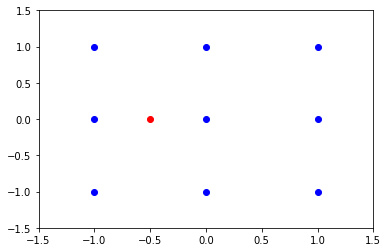

In [74]:
# 定义找出k个邻居的函数
def find_nn(p,points,k):
    """返回集合points里距离p点最近的k个点的索引值"""
    distances = np.zeros(points.shape[0])
    
    for i in range(len(distances)):
        distances[i] = distance(points[i],p)
    # 索引对象
    ind = np.argsort(distances)
    return ind[:k]

#计算最近k个邻居
k = 3
points = np.array([[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]])
p = np.array([-.5,0])

ind = find_nn(p,points,k)

print("最近的{}个邻居的索引:\n{}".format(len(ind),ind))
print("最近的{}个邻居的坐标:\n{}".format(len(ind),points[ind]))

plt.plot(points[:,0], points[:,1], "ob") # blue
plt.plot(p[0],p[1],"or") # red

# 设置图像范围
plt.axis([-1.5,1.5,-1.5, 1.5])

## 5. 找出新的数据点的类别

所属类别: 1


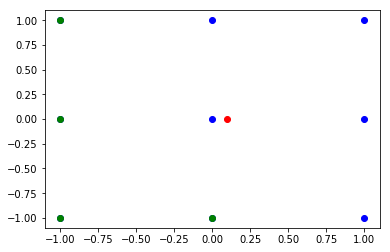

In [103]:
def knn_predict(p, points, outcomes, k=3):
    """返回一个新的数据点的类别."""
    ind = find_nn(p, points, k)
    #print(ind)
    return majority_vote(outcomes[ind])

outcomes = np.array([0,0,0,0,1,1,1,1,1])
p = np.array([0.1,0])
points = np.array([[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]])

res = knn_predict(p,points,outcomes, k=3)
print("所属类别:",res)

# 作图
plt.plot(points[:,0],points[:,1], "bo")
plt.plot(points[:4,0],points[:4,1], "go")
plt.plot(p[0], p[1], "ro")

## 6 产生数据

In [76]:
rs1 = ss.norm(0,1).rvs((5,2))
rs1

array([[ 0.07075087,  0.48857399],
       [ 1.27931978, -1.10570306],
       [ 0.21918449, -1.21770264],
       [-1.70641566, -0.60260823],
       [ 0.10590276,  1.56487915]])

In [77]:
rs2 = ss.norm(1,1).rvs((5,2))
rs2

array([[-0.06162132,  0.89999316],
       [-0.20129355,  1.08433175],
       [ 1.44656625,  0.85361667],
       [ 2.72951867,  0.39449299],
       [-0.08581978,  1.31509141]])

In [78]:
np.concatenate((rs1,rs2), axis=0)

array([[ 0.07075087,  0.48857399],
       [ 1.27931978, -1.10570306],
       [ 0.21918449, -1.21770264],
       [-1.70641566, -0.60260823],
       [ 0.10590276,  1.56487915],
       [-0.06162132,  0.89999316],
       [-0.20129355,  1.08433175],
       [ 1.44656625,  0.85361667],
       [ 2.72951867,  0.39449299],
       [-0.08581978,  1.31509141]])

In [79]:
#生成数据: 特征(点), 标签
def generate_synth_data(n=50):
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))  ), axis=0)
    outcomes = np.concatenate( (np.repeat(0,n),np.repeat(1,n)))
    return (points, outcomes)

generate_synth_data(n=50)                              
    

(array([[ 0.54782663, -0.52283026],
        [-1.093784  , -0.50211576],
        [ 2.24363156, -0.86468743],
        [-0.162719  , -0.04883179],
        [-1.79348491, -1.83012451],
        [-0.23458602, -1.36366146],
        [ 0.50844626, -1.20407456],
        [ 0.93492952, -0.68059614],
        [ 0.04545778, -1.90056454],
        [-1.06901008,  0.62817339],
        [-2.31996647,  0.12196829],
        [ 1.80457053, -1.06807118],
        [ 0.42006639,  0.5437646 ],
        [ 0.4304611 , -0.34131324],
        [-0.3966015 , -1.34884203],
        [ 0.05249739,  1.29875666],
        [ 0.14344097, -0.45781215],
        [-0.16746274, -0.26257346],
        [ 1.4941374 , -2.88997401],
        [ 0.72097128,  0.21188628],
        [-0.64035348, -0.47070245],
        [-1.30178609, -1.90405988],
        [-1.0229775 ,  1.08054536],
        [ 0.41120975, -1.21868701],
        [-0.4036689 ,  0.72406321],
        [-0.03222444,  0.14076011],
        [ 1.35258897,  0.4584292 ],
        [ 0.53872007, -0.679

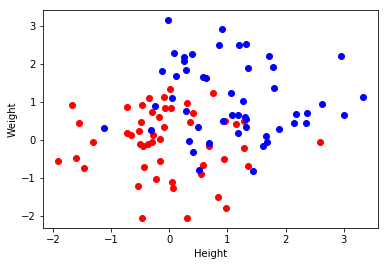

In [80]:
points, outcomes = generate_synth_data(n=50) 

plt.figure()
n = 50
plt.plot(points[:n,0],points[:n,1], "or")
plt.plot(points[n:,0],points[n:,1], "ob")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.savefig("bivar.pdf")

## 6. 制作格点(grid)

In [104]:
def make_pred_grid(predictors, outcomes, limits, h, k):
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h) # h : 步长
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs,ys) 
    
    pred_grid = np.zeros(xx.shape,dtype=int)
    
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x,y])
            pred_grid[j,i] = knn_predict(p, predictors,outcomes, k)
    return (xx,yy, pred_grid)
            
    

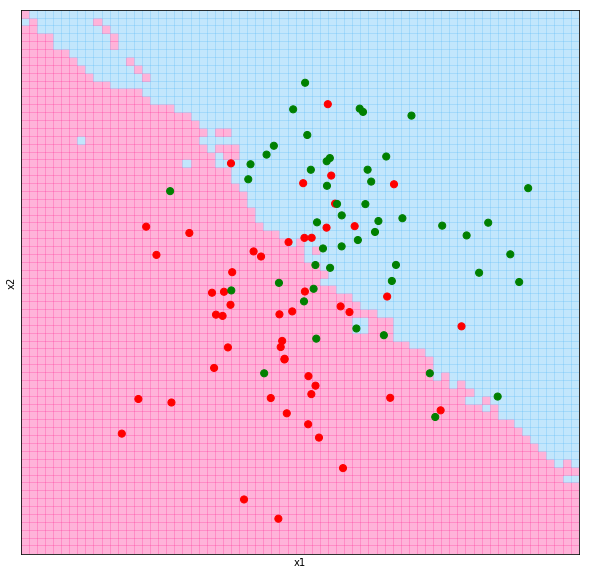

In [111]:
# 对格点作图
def plot_pred_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink", "yellowgreen","lightskyblue"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

predictors, outcomes = generate_synth_data(n=50) 

k = 30 ;  filename = "knn_5.pdf"
limits = (-3,4, -3, 4); h = 0.1

(xx,yy, pred_grid) = make_pred_grid(predictors, outcomes, limits, h, k)
plot_pred_grid (xx, yy, pred_grid, filename)

## 7. Scikit-Learn的使用

In [112]:
import pandas as pd



# X_train, y_trian
X_train = pd.DataFrame([ [0],[1],[2],[3] ])
y_train = [0,0,1,1]

X_train

,0
0,0
1,1
2,2
3,3


In [113]:
y_train

[0, 0, 1, 1]

In [115]:
# 导入kNN分类器
from sklearn.neighbors import KNeighborsClassifier

# 训练模型
model = KNeighborsClassifier(n_neighbors=1)
# 拟合出模型
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [123]:
# 预测
X_test = [[1.2],[2.3],[4.5]]
y_test = model.predict(X_test)
y_test

array([0, 1, 1])

In [120]:
model.predict_proba([[1.2],[2.3]])

array([[1., 0.],
       [0., 1.]])

In [121]:
model.predict([[1.2],[2.3]])

array([0, 1])